# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

> **Note** Results shown below are simulated by means of a SA program written as requested in Exercises $10$.

As it came for free from the Exercise 09 code, my Simulated Annealing Anneals an array of candidate paths also when run as a process alone. Running it with MPI will let him split the paths in different bathes dispatched to each MPI process for computation. The trivial case of only one path can be exploited by setting `NUMBER_OF_PATH=1`


### Cities on a square

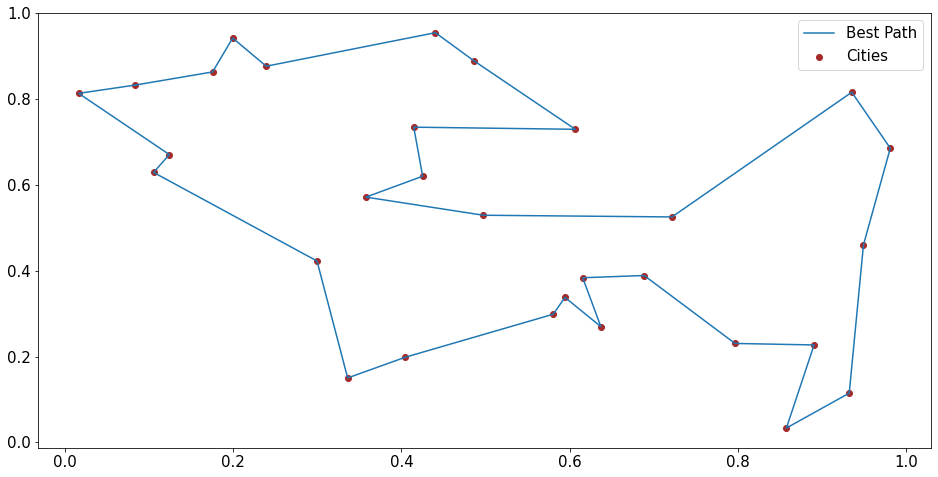

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 13})


plt.figure(figsize=(16,8))
x, f = np.loadtxt("Esercizio10.1/square/bestpath.txt", unpack=True)
plt.plot(x,f, label="Best Path")

x, f = np.loadtxt("Esercizio10.1/square/squareworld", unpack=True, skiprows=1)
plt.scatter(x,f, color='brown', label="Cities")
plt.legend()
plt.show()

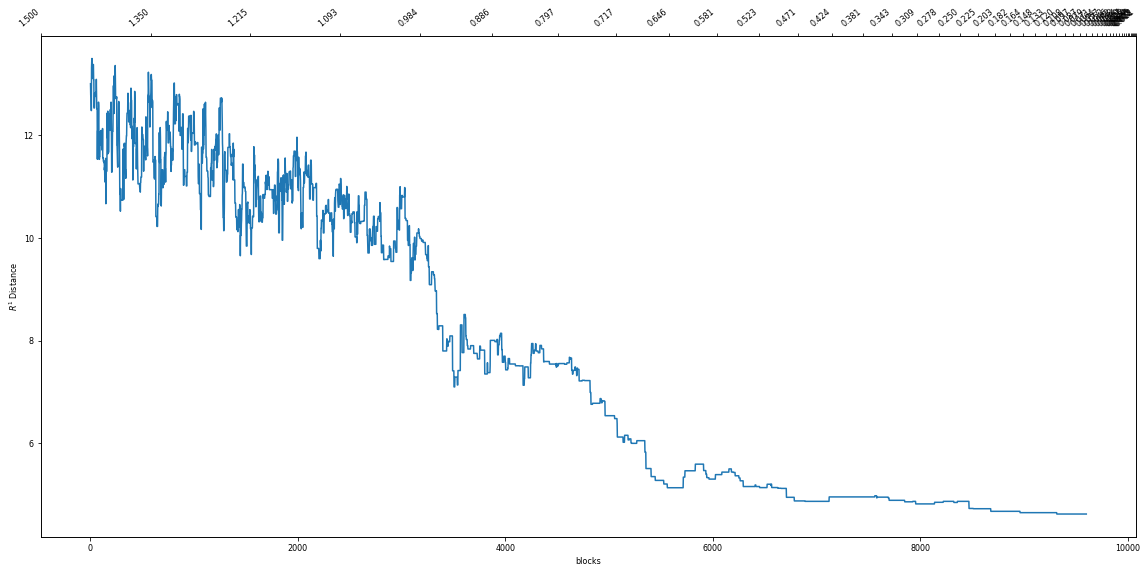

In [98]:
temperatures=np.loadtxt("Esercizio10.1/square/distvstemp.dat", usecols=[0])
x, y = np.loadtxt("Esercizio10.1/square/output_bestdistance.dat", unpack=True, usecols=[0,1])

TMAX=temperatures[0]
TMIN=temperatures[-1]

tt=np.linspace(TMIN, TMAX, len(x))

#print(temperatures) #uncomment to better read temperatures

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,y,label='$R^1_{best path}$')

ax.set_xlabel('blocks')
ax.set_ylabel('$R^1$ Distance')

#secax = ax.secondary_xaxis('top', functions=(steps2T, T2steps))
plt.rcParams.update({'font.size': 8})
secax = ax.twiny()
secax.set_xlim(max(tt), min(tt))
secax.set_xticks(temperatures)
plt.setp(secax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.tight_layout()
plt.show()

The program rescale the temperatures with adaptive steps: the smaller the temperature, the shortest the step, in order to explore better where the minimum of the cost function seems to be. Results are in agreement with Exercise09, if not slightly better.

### Cities on a circle

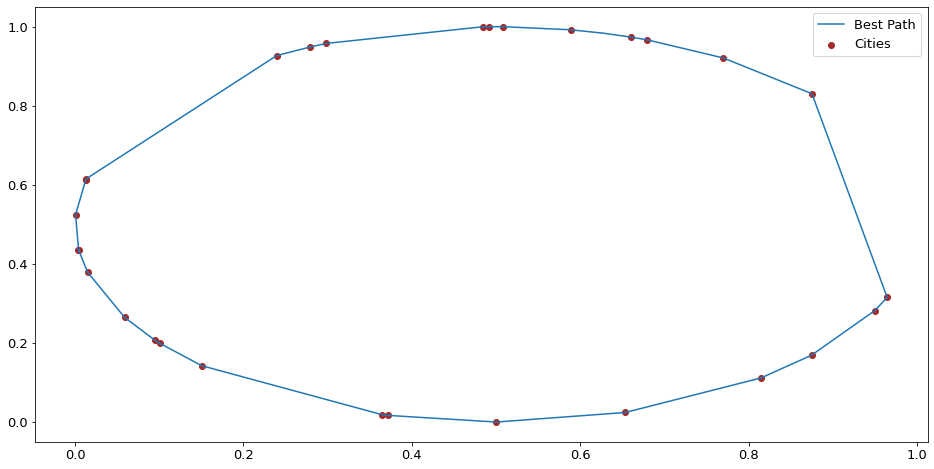

In [100]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(16,8))
x, f = np.loadtxt("Esercizio10.1/circle/bestpath.txt", unpack=True)
plt.plot(x,f, label="Best Path")

x, f = np.loadtxt("Esercizio10.1/circle/circleworld", unpack=True, skiprows=1)
plt.scatter(x,f, color='brown', label="Cities")
plt.legend()
plt.show()

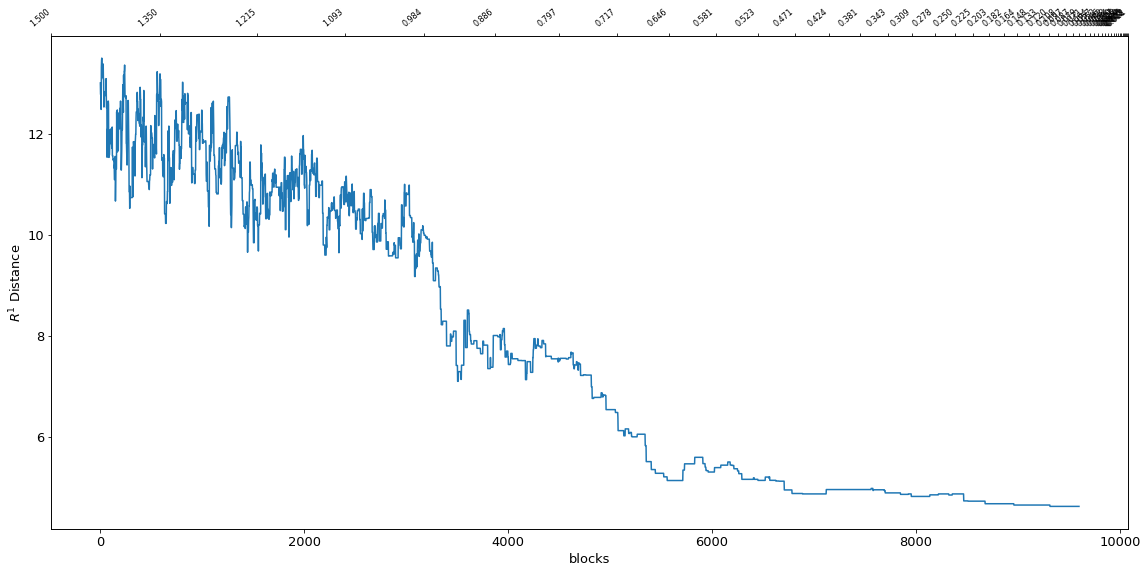

In [101]:
temperatures=np.loadtxt("Esercizio10.1/square/distvstemp.dat", usecols=[0])
x, y = np.loadtxt("Esercizio10.1/square/output_bestdistance.dat", unpack=True, usecols=[0,1])

TMAX=temperatures[0]
TMIN=temperatures[-1]

tt=np.linspace(TMIN, TMAX, len(x))

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,y,label='$R^1_{best path}$')

ax.set_xlabel('blocks')
ax.set_ylabel('$R^1$ Distance')

plt.rcParams.update({'font.size': 8})
secax = ax.twiny()
secax.set_xlim(max(tt), min(tt))
secax.set_xticks(temperatures)
plt.setp(secax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.tight_layout()
plt.show()

### Exercise 10.2

### Cities on a square

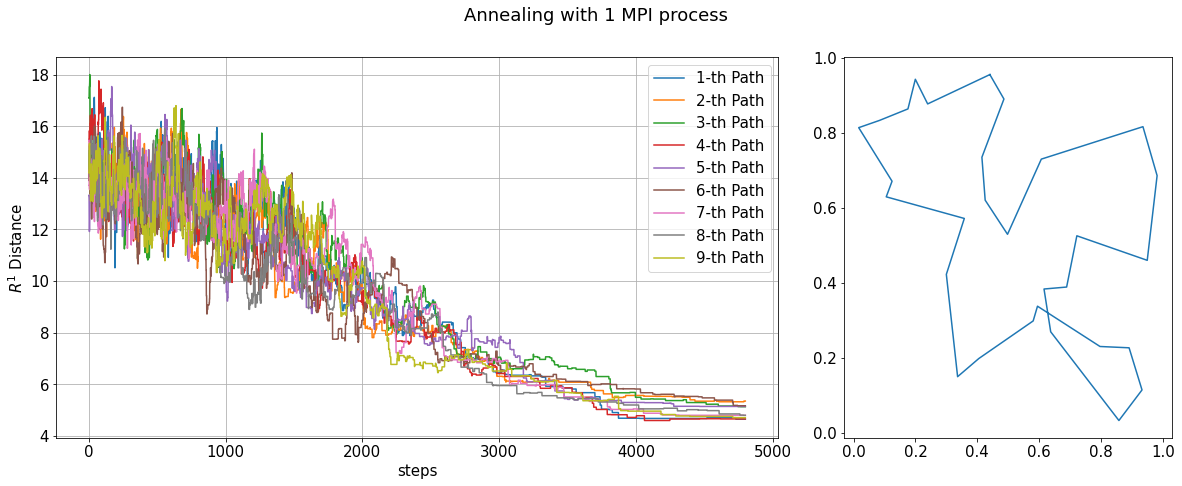

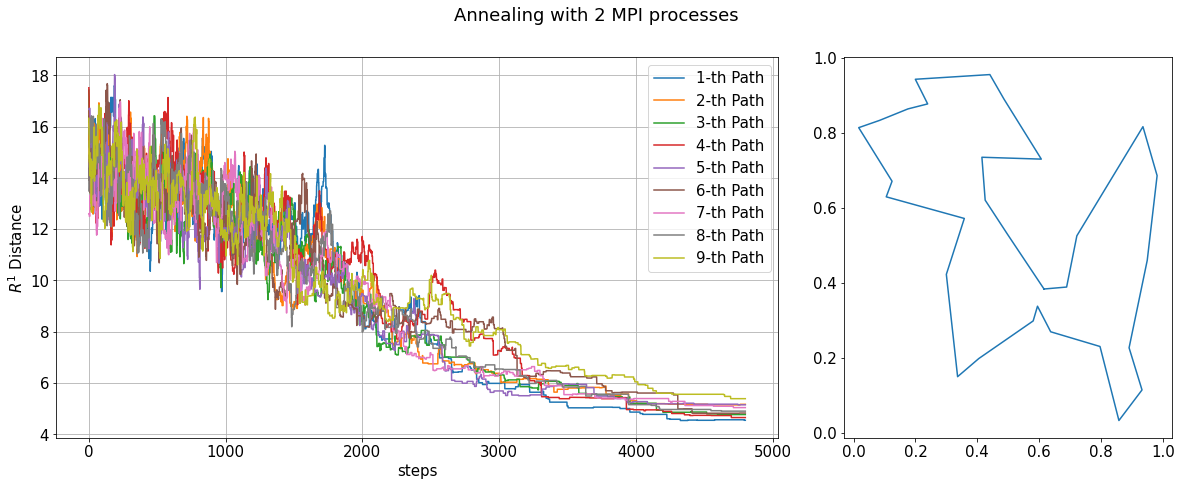

In [102]:
plt.rcParams.update({'font.size': 15})
paths=np.loadtxt("Esercizio10.2/1proc/square/paths0.txt", unpack=True)
plt.figure(figsize=(20,7))
plt.suptitle("Annealing with 1 MPI process")
plt.subplot2grid((1, 3), (0, 0), colspan=2)
for i in range(1,paths.shape[0]):
    plt.plot(paths[i],label=str(i)+'-th Path')
plt.grid(True)
plt.xlabel("steps")
plt.ylabel('$R^1$ Distance')
plt.legend()

plt.subplot2grid((1, 3), (0, 2), colspan=1)

x,y=np.loadtxt("Esercizio10.2/1proc/square/bestpath.txt", unpack=True)
plt.plot(x,y)

plt.show()

paths0=np.loadtxt("Esercizio10.2/2procs/square/paths0.txt", unpack=True)
paths1=np.loadtxt("Esercizio10.2/2procs/square/paths1.txt", unpack=True)

paths=np.concatenate((paths0,paths1),axis=0)
plt.figure(figsize=(20,7))
plt.suptitle("Annealing with 2 MPI processes")
plt.subplot2grid((1, 3), (0, 0), colspan=2)

for i in range(1,paths.shape[0]):
    plt.plot(paths[i],label=str(i)+'-th Path')
plt.grid(True)
plt.xlabel("steps")
plt.ylabel('$R^1$ Distance')
plt.legend()


plt.subplot2grid((1, 3), (0, 2), colspan=1)
x,y=np.loadtxt("Esercizio10.2/2procs/square/bestpath.txt", unpack=True)
plt.plot(x,y)
plt.show()


### Cities on a circle

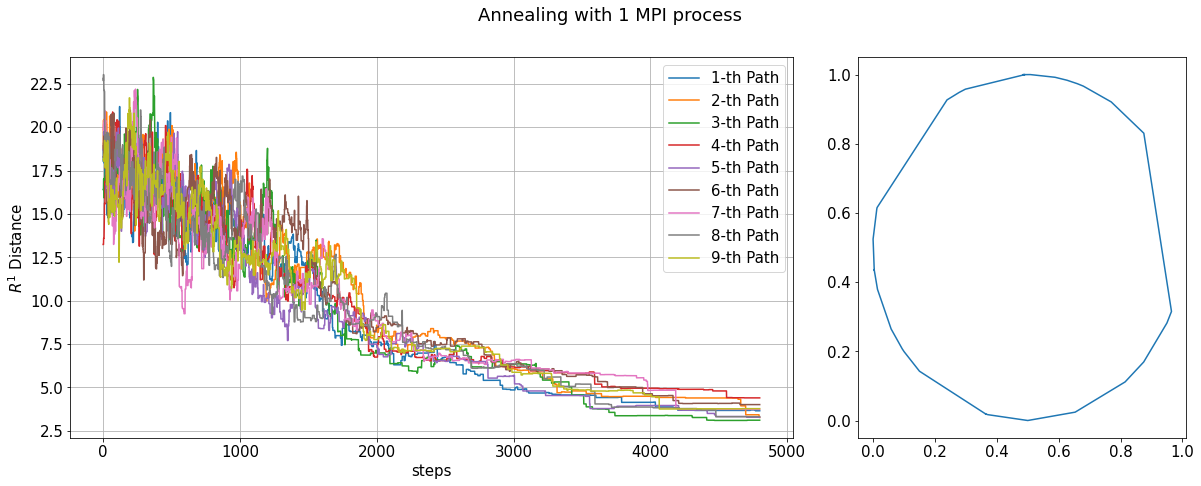

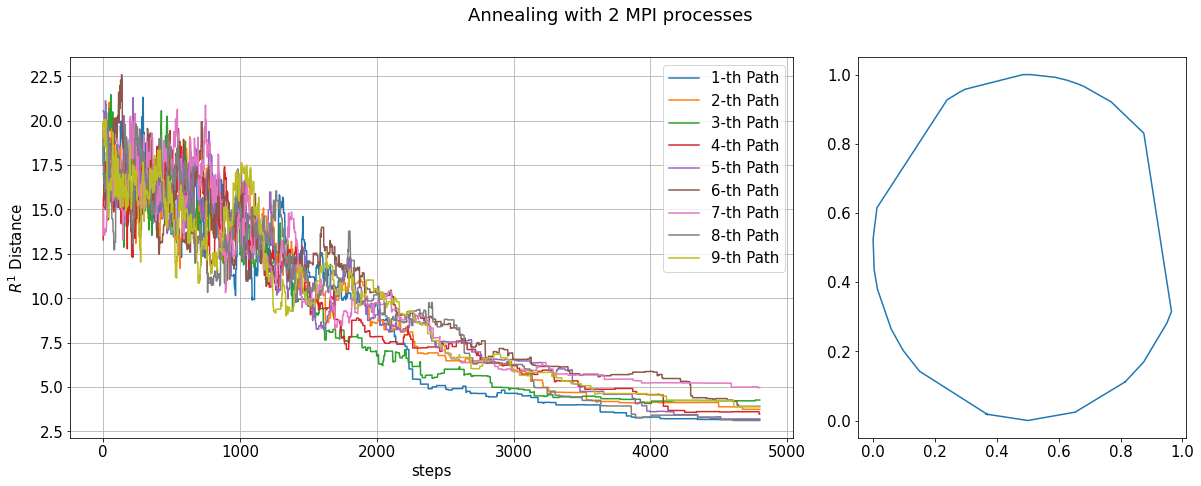

In [103]:
plt.rcParams.update({'font.size': 15})
paths=np.loadtxt("Esercizio10.2/1proc/circle/paths0.txt", unpack=True)
plt.figure(figsize=(20,7))
plt.suptitle("Annealing with 1 MPI process")
plt.subplot2grid((1, 3), (0, 0), colspan=2)
for i in range(1,paths.shape[0]):
    plt.plot(paths[i],label=str(i)+'-th Path')
plt.grid(True)
plt.xlabel("steps")
plt.ylabel('$R^1$ Distance')
plt.legend()

plt.subplot2grid((1, 3), (0, 2), colspan=1)

x,y=np.loadtxt("Esercizio10.2/1proc/circle/bestpath.txt", unpack=True)
plt.plot(x,y)

plt.show()

paths0=np.loadtxt("Esercizio10.2/2procs/circle/paths0.txt", unpack=True)
paths1=np.loadtxt("Esercizio10.2/2procs/circle/paths1.txt", unpack=True)

paths=np.concatenate((paths0,paths1),axis=0)
plt.figure(figsize=(20,7))
plt.suptitle("Annealing with 2 MPI processes")
plt.subplot2grid((1, 3), (0, 0), colspan=2)

for i in range(1,paths.shape[0]):
    plt.plot(paths[i],label=str(i)+'-th Path')
plt.grid(True)
plt.xlabel("steps")
plt.ylabel('$R^1$ Distance')
plt.legend()


plt.subplot2grid((1, 3), (0, 2), colspan=1)
x,y=np.loadtxt("Esercizio10.2/2procs/circle/bestpath.txt", unpack=True)
plt.plot(x,y)
plt.show()



The quality of the results obtained with both with 1(serial) or 2 mpi processes is the same.
On my computer, equipped 4th-gen Dual core intel CPU, simulation with 1 MPI core takes approximately $50\%$ more time than with 2 MPI cores. The failure in reaching optimal 2x speedup could be in part due to I/O processes.